## Simplifying data

Previously, we focused on the details around collecting data, on understanding its structure and how it's measured. Collecting data is just the starting point in a data analysis workflow. We rarely collect data just for the sake of collecting it. We collect data to analyze it, and we analyze it for different purposes:

- To describe phenomena in the world (science).
- To make better decisions (industries).
- To improve systems (engineering).
- To describe different aspects of our society (data journalism); etc.

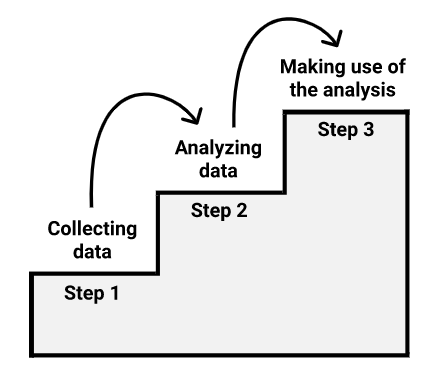


Our capacity to understand a data set just by looking at it in a table format is limited, and it decreases dramatically as the size of the data set increases. To be able to analyze data, we need to find ways to simplify it.

The WNBA data set we've been working with has 143 rows and 32 columns. This might not seem like much compared to other data sets, but it's still extremely difficult to find any patterns just by eyeballing the data set in a table format. With 32 columns, even five rows would take us a couple of minutes to analyze:

In [1]:
import pandas as pd

wnba = pd.read_csv('wnba.csv')

wnba.head(5)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


One way to simplify this data set is to select a variable, **count how many times each unique value occurs, and represent the frequencies (the number of times a unique value occurs) in a table**. This is how such a table looks for the Pos (player position) variable:

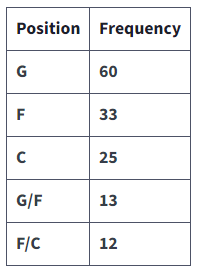

Because 60 of the players in our data set play as guards, the frequency for guards is 60. Because 33 of the players are forwards, the frequency for forwards is 33, and so on.

With the table above, we simplified the Pos variable by transforming it to a **comprehensible format**. Instead of having to deal with analyzing 143 values (the length of the Pos variable), now we only have five values to analyze. We can make a few conclusions now that would have been difficult and time consuming to reach at just by looking at the list of 143 values:

- We can see how the frequencies are distributed:
    - Almost half of the players play as guards.
    - Most of the players are either guards, forwards or centers.
    - Very few players have combined positions (like guard/forward or forward/center).
- We can make comparisons with ease:
    - There are roughly two times more guards than forwards.
    - There are slightly less centers that forwards; etc.
    
Because the table above shows how *frequencies are distributed*, it's often called a **frequency distribution table**, or, shorter, **frequency table** or **frequency distribution**. Throughout this mission, our focus will be on learning the details behind this form of simplifying data.

## Frequency distribution tables

A frequency distribution table has two columns. One column records the unique values of a variable, and the other the frequency of each unique value.

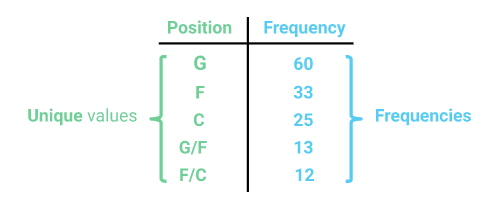

To generate a frequency distribution table using Python, we can use the Series.value_counts() method. Let's try it on the Pos column, which describes the position on the court of each individual.

In [2]:
wnba['Pos'].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

*Using the Series.value_counts() method, generate frequency distribution tables for the Height column:*

In [4]:
wnba['Height'].value_counts()

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

### Sorting frequency distribution tables

As you might have noticed, pandas sorts the tables by default in the descending order **of the frequencies**. Let's consider again the frequency distribution table for the Pos variable, which is measured on a nominal scale:

In [5]:
wnba['Pos'].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

This default is harmless for variables measured on a nominal scale because the unique values, although different, have no direction (we can't say, for instance, that centers are greater or lower than guards). The default actually helps because we can immediately see which values have the greatest or lowest frequencies, we can make comparisons easily, etc.

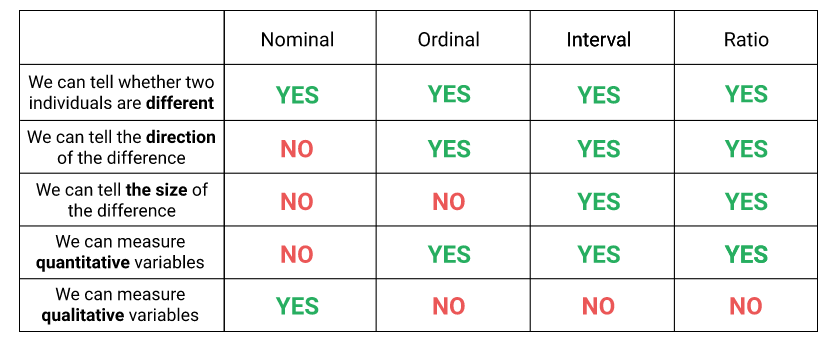

For variables measured on ordinal, interval, or ratio scales, this default makes the analysis of the tables more difficult because the unique values have direction (some uniques values are greater or lower than others). Let's consider the table for the Height variable, which is measured on a ratio scale:

In [6]:
wnba['Height'].value_counts()

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

Because the Height variable has direction, we might be interested to find:

- How many players are under 170 cm?
- How many players are very tall (over 185)?
- Are there any players below 160 cm?

It's time-consuming to answer these questions using the table above. The solution is to sort the table ourselves.

wnba['Height'].value_counts() returns a Series object with the measures of height as indices. This allows us to sort the table by index using the Series.sort_index() method:

In [7]:
wnba['Height'].value_counts().sort_index()

165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64

We can also sort the table by index in a descending order using 

`wnba['Height'].value_counts().sort_index(ascending = False)`

*Generate a frequency distribution table for the Age variable, which is measured on a ratio scale, and sort the table by unique values.*

In [10]:
age_ascending = wnba['Age'].value_counts().sort_index()
display(age_ascending)
age_descending = wnba['Age'].value_counts().sort_index(ascending = False)
display(age_descending)

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

## Sorting tables for ordinal variables

The sorting techniques learned in the previous screen can't be used for ordinal scales where the measurement is done using words. We don't have a variable measured on an ordinal scale in our data set, but let's use the PTS variable and the conventions below to create one and see why the techniques we learned don't work:

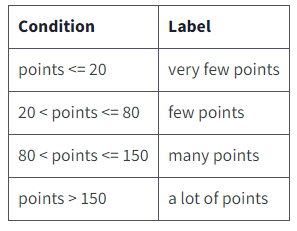

We name the new column PTS_ordinal_scale. Below is a short extract from our data set containing the new column:

In [11]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

In [13]:
wnba['PTS_ordinal_scale'].head(5)

0     many, but below average
1    average number of points
2    average number of points
3    average number of points
4                  few points
Name: PTS_ordinal_scale, dtype: object

Let's examine the frequency distribution table for the PTS_ordinal_scale variable:

In [14]:
wnba['PTS_ordinal_scale'].value_counts()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

We want to sort the labels in an ascending or descending order, but using Series.sort_index() doesn't work because the method can't infer quantities from words like "few points". Series.sort_index() can only order the index alphabetically in an ascending or descending order:

In [15]:
wnba['PTS_ordinal_scale'].value_counts().sort_index()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

The solution is to do selection by index label. The output of `wnba['PTS_ordinal_scale'].value_counts()` is a Series object with the labels as indices. This means **we can select by indices to reorder in any way we like**:

In [17]:
wnba['PTS_ordinal_scale'].value_counts()[['very few points', 'few points', 'many, but below average', 'average number of points',
                                          'more than average','much more than average']]

very few points             12
few points                  27
many, but below average     25
average number of points    45
more than average           21
much more than average      13
Name: PTS_ordinal_scale, dtype: int64

This approach can be time-consuming because it involves **more typing than is ideal**. We can use iloc[] instead to reorder by position:

In [24]:
wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

## Proportions and percentages

When we analyze distributions, we're often interested in answering questions about proportions and percentages. For instance, we may want to answer the following questions about the distribution of the Pos (player position) variable:

- What proportion of players are guards?
- What percentage of players are centers?
- What percentage of players have mixed positions?

It's very difficult to answer these questions precisely just by looking at the frequencies:

In [25]:
wnba['Pos'].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

We can see that almost half of the players are guards, but we need more granularity to answer the first question above. For that, we can transform frequencies to proportions.

The proportion of each player position quantifies how many players play in a certain position relative to the total number of players. There are 60 guards and 143 players overall (including guards) so the proportion of guards is $\frac{60}{143}$

In practical data analysis, it's much more common to express the fraction as a decimal between 0 and 1. So we'd say that 
0.42 (the result of $\frac{60}{143}$) of the players are guards.

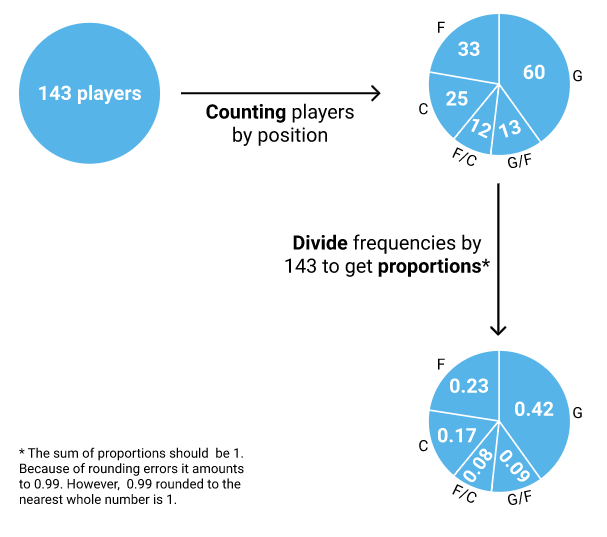

In pandas, we can compute all the proportions at once by dividing each frequency by the total number of players:

In [26]:
wnba['Pos'].value_counts() / len(wnba)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

It's slightly faster though to use Series.value_counts() with the normalize parameter set to True:

In [27]:
wnba['Pos'].value_counts(normalize = True)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

To find percentages, we just have to multiply the proportions by 100:

In [28]:
wnba['Pos'].value_counts(normalize = True) * 100

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64

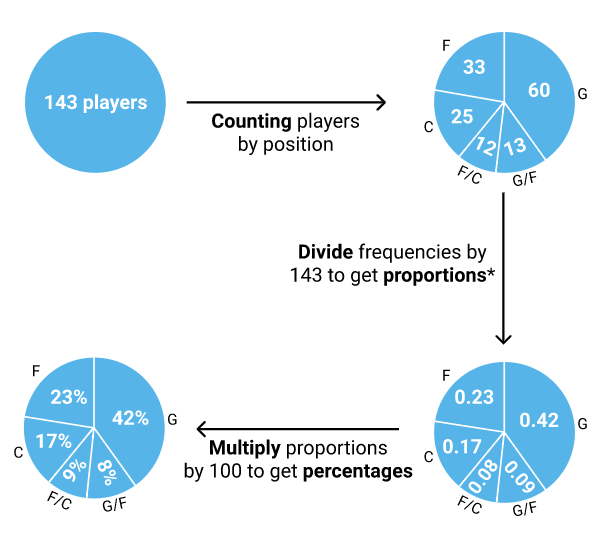

Because proportions and percentages are relative to the total number of instances in some set of data, they are called **relative frequencies**. In contrast, the frequencies we've been working with so far are called **absolute frequencies** because they are absolute counts and don't relate to the total number of instances.

Answer the following questions about the Age variable:

- *What proportion of players are 25 years old?*

In [41]:
proportion_25 = wnba['Age'].value_counts(normalize = True)[25]
proportion_25

0.1048951048951049

- *What percentage of players are 30 years old?*

In [42]:
percentage_30 = wnba['Age'].value_counts(normalize = True)[30] * 100
percentage_30

6.293706293706294

- *What percentage of players are 30 years or older?*

In [43]:
over_30 = wnba['Age'].value_counts(normalize = True).sort_index().loc[30:]
percentage_over_30 = over_30.sum() * 100
percentage_over_30

26.573426573426573

- *What percentage of players are 23 years or younger?*

In [44]:
below_23 = wnba['Age'].value_counts(normalize = True).sort_index(ascending = False).loc[23:]
percentage_below_23 = below_23.sum() * 100
percentage_below_23

18.881118881118883

## Percentiles and percentile Ranks

In the previous exercise, we found that the percentage of players aged 23 years or younger is 19% (rounded to the nearest integer). This percentage is also called a **percentile rank**.

A percentile rank of a value $x$  in a frequency distribution is given by the percentage of values that are equal or less than 
$x$. In our last exercise, $x=23$, and the fact that 23 has a percentile rank of 19% means that 19% of the values are equal to or less than 23.

In this context, the value of 23 is called the 19th percentile. If a value $x$ is the 19th percentile, it means that 19% of all the values in the distribution are equal to or less than $x$.

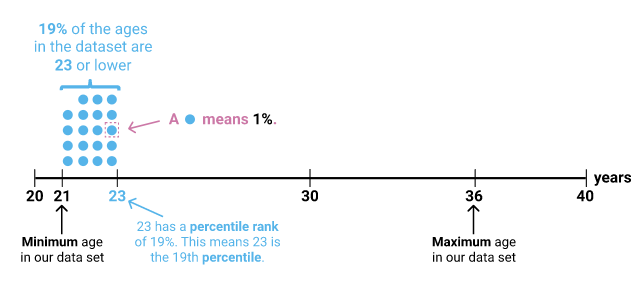

When we're trying to answer questions similar to *"What percentage of players are 23 years or younger?"*, **we're trying to find percentile ranks**. In our previous exercise, our answer to this question was 18.881%. We can arrive at the same answer a bit faster using the `percentileofscore(a, score, kind='weak')` function from `scipy.stats`:

In [45]:
from scipy.stats import percentileofscore

print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


We need to use `kind = 'weak'` to indicate that we want to find the percentage of values thar are equal to or less than the value we specify in the score parameter.

Another question we had was what percentage of players are 30 years or older. We can answer this question too using percentile ranks. First we need to find **the percentage of values equal to or less than 29 years (the percentile rank of 29)**. The rest of the values must be 30 years or more.

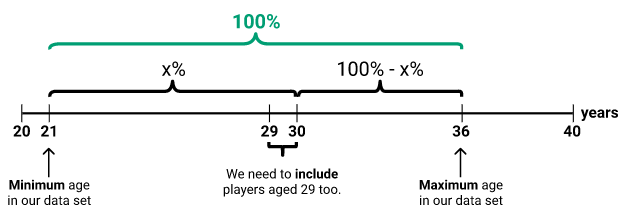

In our exercise the answer we found was 26.573%. This is what we get using the technique we've just learned:

In [46]:
print(100 - percentileofscore(wnba['Age'], 29, kind = 'weak'))

26.573426573426573


In the next screen, we'll learn how to find quickly any percentile using pandas. For now, let's practice percentile ranks more.

Import `percentileofscore()` from `scipy.stats`, and then use it to answer the following questions:

- What percentage of players played half the number of games or less in the 2016-2017 season (there are 34 games in the WNBA’s regular season)? Use the Games Played column to find the data you need, and assign your answer to a variable named percentile_rank_half_less.
- What percentage of players played more than half the number of games of the season 2016-2017? Assign your result to percentage_half_more.

In [51]:
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind = 'weak')
percentile_rank_half_less

16.083916083916083

In [53]:
percentage_half_more = 100 - percentile_rank_half_less
percentage_half_more

83.91608391608392

## Finding percentiles with pandas

To find percentiles, we can use the `Series.describe()` method, which returns by default the 25th, the 50th, and the 75th percentiles:

In [54]:
wnba['Age'].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

We are not interested here in the first three rows of the output (count, mean, and standard deviation). We can use iloc[] to isolate just the output we want:

In [55]:
wnba['Age'].describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

The 25th, 50th, and 75th percentiles pandas returns by default are the scores that divide the distribution into four equal parts.

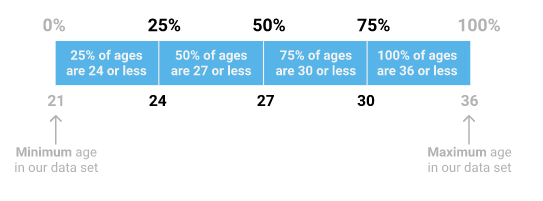

The three percentiles that divide the distribution in four equal parts are also known as quartiles (from the Latin quartus which means four). There are three quartiles in the distribution of the Age variable:

- The first quartile (also called *lower* quartile) is 24 (note that 24 is also the 25th percentile).
- The second quartile (also called the *middle* quartile) is 27 (note that 27 is also the 50th percentile).
- And the third quartile (also called the *upper* quartile) is 30 (note that 30 is also the 75th percentile).

We may be interested to find the percentiles for percentages other than 25%, 50%, or 75%. For that, we can use the `percentiles` parameter of `Series.describe()`. This parameter requires us to pass the percentages we want as proportions between 0 and 1.

In [56]:
wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:]

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64

Percentiles don't have a single standard definition, so don't be surprised if you get very similar (but not identical) values if you use different functions (especially if the functions come from different libraries).

*Use the Age variable along with Series.describe() to answer the following questions:*

- *What's the upper quartile of the Age variable? Assign your answer to a variable named age_upper_quartile.*
- *What's the middle quartile of the Age variable? Assign your answer to a variable named age_middle_quartile.*
- *What's the 95th percentile of the Age variable? Assign your answer to a variable named age_95th_percentile.*

In [57]:
wnba['Age'].describe(percentiles = [.25, .5, .75, .95]).iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
95%    34.0
max    36.0
Name: Age, dtype: float64

In [62]:
perc_age = wnba['Age'].describe(percentiles = [.25, .5, .75, .95])
age_upper_quartile = perc_age.loc['75%']
age_middle_quartile = perc_age.loc['50%']
age_95th_percentile = perc_age.loc['95%']

## Grouped frequency distribution tables

With frequency tables, we're trying to transform relatively large and incomprehensible amounts of data to a table format we can understand. However, not all frequency tables are straightforward:

In [63]:
wnba['Weight'].value_counts().sort_index()

55.0      1
57.0      1
58.0      1
59.0      2
62.0      1
63.0      3
64.0      5
65.0      4
66.0      8
67.0      1
68.0      2
69.0      2
70.0      3
71.0      2
73.0      6
74.0      4
75.0      4
76.0      4
77.0     10
78.0      5
79.0      6
80.0      3
81.0      5
82.0      4
83.0      4
84.0      9
85.0      2
86.0      7
87.0      6
88.0      6
89.0      3
90.0      2
91.0      3
93.0      3
95.0      2
96.0      2
97.0      1
104.0     2
108.0     1
113.0     2
Name: Weight, dtype: int64

There's a lot of granularity in the table above, but for this reason it's not easy to find patterns. The table for the Weight variable is a relatively happy case - the frequency tables for variables like PTS, BMI, or MIN are even more daunting.

If the variable is measured on an interval or ratio scale, a common solution to this problem is to group the values in equal intervals. For the Weight variable, the values range from 55 to 113 kg, which amounts to a difference of 58 kg. We can try to segment this 58 kg interval in ten smaller and equal intervals. This will result in ten intervals of 5.8 kg each:

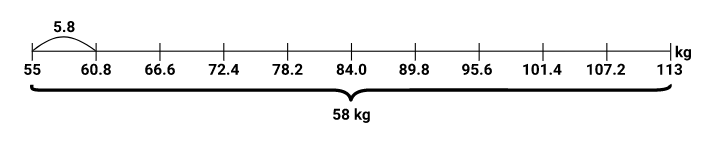

Fortunately, pandas can handle this process gracefully. We only need to make use of the bins parameter of the `bins` parameter of `Series.value_counts()`. We want ten equal intervals, so we need to specify `bins = 10`:

In [65]:
wnba['Weight'].value_counts(bins = 10).sort_index()

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64

In [66]:
wnba['Weight'].value_counts(bins = 10, normalize = True).sort_index()

(54.941, 60.8]    0.034965
(60.8, 66.6]      0.146853
(66.6, 72.4]      0.069930
(72.4, 78.2]      0.230769
(78.2, 84.0]      0.216783
(84.0, 89.8]      0.167832
(89.8, 95.6]      0.069930
(95.6, 101.4]     0.020979
(101.4, 107.2]    0.013986
(107.2, 113.0]    0.020979
Name: Weight, dtype: float64

(54.941, 60.8], (60.8, 66.6] or (107.2, 113.0] are number intervals. The ( character indicates that the starting point is not included, while the ] indicates that the endpoint is included. (54.941, 60.8] means that 54.941 isn't included in the interval, while 60.8 is. The interval (54.941, 60.8] contains all real numbers greater than 54.941 and less than or equal to 60.8.

We can see above that there are 10 equal intervals, 5.8 each. The first interval, (54.941, 60.8] is confusing, and has to do with how pandas internals show the output. One way to understand this is to convert 54.941 to 1 decimal point, like all the other values are. Then the first interval becomes (54.9, 60.8]. 54.9 is not included, so you can think that the interval starts at the minimum value of the Weight variable, which is 55.

Because we group values in a table to get a better sense of frequencies in the distribution, the table we generated above is also known as a grouped frequency distribution table. Each group (interval) in a **grouped frequency distribution table** is also known as a **class interval**. (107.2, 113.0], for instance, is a class interval.

Using the grouped frequency distribution table we generated above for the Weight variable, we can find patterns easier in the distribution of values:

- Most players weigh somewhere between 70 and 90 kg.
- Very few players weigh over 100 kg.
- Very few players weigh under 60 kg; etc.

*Examine the frequency table for the PTS (total points) variable trying to find some patterns in the distribution of values. Then, generate a grouped frequency distribution table for the PTS variable with the following characteristics:*

- *The table has 10 class intervals.*
- *For each class interval, the table shows percentages instead of frequencies.*
- *The class intervals are sorted in descending order.*

*Assign the table to a variable named grouped_freq_table, then print it and try again to find some patterns in the distribution of values.*

In [68]:
wnba['PTS'].value_counts()

96     3
217    3
116    2
277    2
87     2
      ..
159    1
161    1
278    1
171    1
514    1
Name: PTS, Length: 123, dtype: int64

In [73]:
wnba['PTS'].value_counts(bins = 10, normalize = True).sort_index(ascending = False) * 100

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

## Information Loss

When we generate grouped frequency distribution tables, there's an inevitable information loss. Let's consider this table:

In [74]:
wnba['PTS'].value_counts(bins = 10)

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(234.8, 293.0]    17
(118.4, 176.6]    17
(351.2, 409.4]    10
(409.4, 467.6]     8
(293.0, 351.2]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64

Looking at the first interval, we can see there are 30 players who scored between 2 and 60 points (2 is the minimum value in our data set, and points in basketball can only be integers). However, because we grouped the values, we lost more granular information like:

- How many players, if any, scored exactly 50 points.
- How many players scored under 10 points.
- How many players scored between 20 and 30 points, etc.

To get back this granular information, we can increase the number of class intervals. However, if we do that, we end up again with a table that's lengthy and very difficult to analyze.

On the other side, if we decrease the number of class intervals, we lose even more information:

In [75]:
wnba['PTS'].value_counts(bins = 5).sort_index()

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64

There are 54 players that scored between 2 and 118 points. We can get this information from the first table above too, but there's some extra information there: among these 54 players, 30 scored between 2 and 60 points, and 24 scored between 61 and 118 points. We lost this information when we decreased the number of class intervals from 10 to 5.

We can conclude there is a trade-off between the information in a table, and how comprehensible the table is.

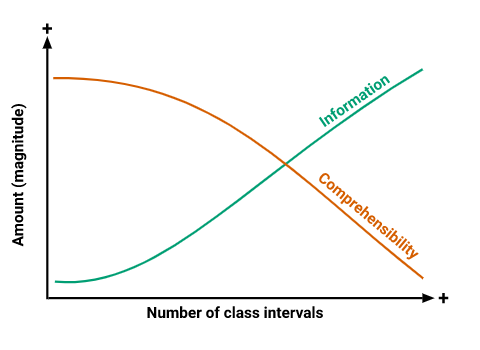

When we increase the number of class intervals, we can get more information, but the table becomes harder to analyze. When we decrease the number of class intervals, we get a boost in comprehensibility, but the amount of information in the table decreases.

As a rule of thumb, 10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility.

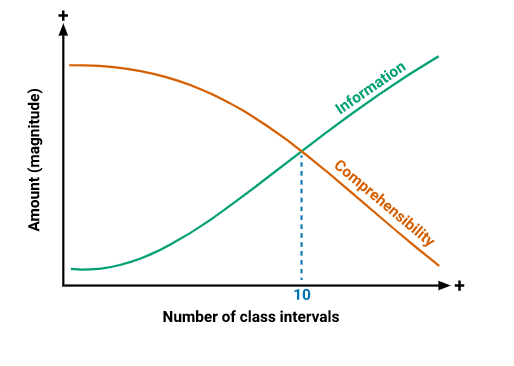

## Readability for grouped frequency tables

Pandas helps a lot when we need to explore quickly grouped frequency tables. However, the intervals pandas outputs are confusing at first sight:

In [76]:
wnba['PTS'].value_counts(bins = 5).sort_index()

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64

Imagine we'd have to publish the table above in a blog post or a scientific paper. The readers will have a hard time understanding the intervals we chose. They'll also be puzzled by the decimal numbers because points in basketball can only be integers.

To fix this, we can define the intervals ourselves. For the table above, we can define six intervals of 100 points each, and then count how many values fit in each interval. We'd like to end with a table like this:

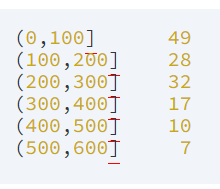

Next, we show one way to code the intervals. We start with creating the intervals using the `pd.interval_range()` function:

In [77]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')


Next, we create a new Series using the intervals as indices, and, for now, 0 as values:

In [78]:
gr_freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
print(gr_freq_table)

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64


Next, we loop through the values of the PTS column, and for each value:

- We loop through the intervals we defined previously, and for each interval:
    - We check whether the current value from the PTS column belongs to that interval.
    - If the value doesn't belong to an interval, we continue the inner loop over the intervals.
    - If the value belongs to an interval:
        - We update the counting for that interval in gr_freq_table by adding 1.
        - We exit the inner loop over the intervals with break because a value can belong to one interval only, and it makes no sense to continue the loop (without using break, we'll get the same output but we'll do many redundant iterations).

In [79]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64


Now we do a quick check of our work. There are 143 players in the data set, so the frequencies should add up to 143:

In [86]:
print(gr_freq_table.sum())

143


Note that we're not restricted by the minimum and maximum values of a variable when we define intervals. The minimum number of points is 2, and the maximum is 584, but our intervals range from 1 to 600.

*Using the techniques above, generate a grouped frequency table for the PTS variable. The table should have the following characteristics:*

- *There are 10 class intervals.*
- *The first class interval starts at 0 (not included).*
- *The last class interval ends at 600 (included).*
- Each interval has a range of 60 points.*

Assign the table to a variable named gr_freq_table_10.

In [87]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0] * 10, index = intervals)

# Loop over values of the 'PTS' column...
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

## Frequency tables and continuous variables

Remember from the previous mission that a height of 175 cm is just an interval bounded by the real limits of 174.5 cm (lower real limit) and 175.5 (upper real limit). When we build frequency tables for continuous variables, we need to take into account that the values are intervals.

The height of 175 cm has a frequency of 16 in the distribution of the Height variable:

In [88]:
wnba['Height'].value_counts()[175]

16

This doesn't mean that there are 16 players that are all exactly 175 cm tall. It rather means that there are 16 players with a height that's somewhere between 174.5 cm and 175.5 cm.

A similar reasoning applies when we read grouped frequency tables. If we had an interval of (180, 190] for a continuous variable, 180 and 190 are not the real limits. Instead, the real limits are given by the interval (179.5, 190.5], with 179.5 being the lower real limit of 180, and 190.5 the upper real limit of 190.

Continuous variables affect as well the way we read percentiles. For instance, the 50th percentile (middle quartile) in the distribution of the Height variable is 185 cm:

In [89]:
print(wnba['Height'].describe().iloc[3:])

min    165.0
25%    176.5
50%    185.0
75%    191.0
max    206.0
Name: Height, dtype: float64


This means that 50% of the values are less than or equal to 185.5 cm (the upper limit of 185 cm), not equal to 185 cm.